Trained a multi-layer feed-forward neural network to predict the type of wine. My network has one hidden layer. 
I used the `wine.csv` data with the goal of building a red or white wine classifier. Used all the features in the dataset, allowing the network to decide how to build the internal weighting system.

 Loaded the `wine.csv` data and prepared the data for analysis: Split the data into training and testing and normalize the features.
Trained a logistic regression classifier to predict the type of wine (red vs. white). Reported the accuracy of the model. 
Trained a multi-layer feed-forward neural network to predict the type of wine, one hidded layer. 
Tuned my neural network by trying different values for the learning rate and the number of neurons in the hidden layer. 
Reported the accuracy of the best model I obtained in the previous step. 

Determined what the best neural network structure and hyperparameter settings results in the best predictive capability

In [1]:
SEED = 2005

Import Python modules

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

Set global options

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

##train, tune and test sets

In [4]:
# read in: I stored csv files under the same directory as this notebook
df_wine = pd.read_csv("wine.csv")

In [5]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6497 entries, 0 to 6496

Data columns (total 13 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   fixed acidity         6497 non-null   float64

 1   volatile acidity      6497 non-null   float64

 2   citric acid           6497 non-null   float64

 3   residual sugar        6497 non-null   float64

 4   chlorides             6497 non-null   float64

 5   free sulfur dioxide   6497 non-null   float64

 6   total sulfur dioxide  6497 non-null   float64

 7   density               6497 non-null   float64

 8   pH                    6497 non-null   float64

 9   sulphates             6497 non-null   float64

 10  alcohol               6497 non-null   float64

 11  quality               6497 non-null   int64  

 12  Class                 6497 non-null   int64  

dtypes: float64(11), int64(2)

memory usage: 660.0 KB


**I split data into 3 parts: train (70%), tune (15%), and test (15%). The tune set is used to perform model selection and feature selection .**

In [7]:
# data split to have 70% of train, 30% of tune + test
df_train, df_tune_test = train_test_split(df_wine,
                                          test_size=0.3,
                                          random_state=SEED,
                                          shuffle=True,
                                          stratify=None)

In [8]:
# further evenly split between tune and test
df_tune, df_test = train_test_split(df_tune_test,
                                    test_size=0.5,
                                    random_state=SEED,
                                    shuffle=True,
                                    stratify=None)

In [9]:
# double check data dimensions after the split
print(df_wine.shape)
print(df_train.shape)
print(df_tune.shape)
print(df_test.shape)

(6497, 13)

(4547, 13)

(975, 13)

(975, 13)


**Target in numpy arrays to be used in training**

In [10]:
y_train = df_train["Class"].to_numpy()
y_tune = df_tune["Class"].to_numpy()
y_test = df_test["Class"].to_numpy()

In [11]:
# drop target to predict
df_train = df_train.drop(["Class"], axis=1)
df_tune = df_tune.drop(["Class"], axis=1)
df_test = df_test.drop(["Class"], axis=1)

In [12]:
# scale numeric features
sc = StandardScaler()
sc.fit(df_train)

StandardScaler()

In [13]:
# transform train, tune and test
df_train_processed = pd.DataFrame(sc.transform(df_train), columns=df_train.columns)
df_tune_processed = pd.DataFrame(sc.transform(df_tune), columns=df_tune.columns)
df_test_processed = pd.DataFrame(sc.transform(df_test), columns=df_test.columns)

In [14]:
# double check dimensions
print(df_train.shape)
print(df_train_processed.shape)

(4547, 12)

(4547, 12)


In [15]:
# let's take a look at data after all these transformations
df_train_processed.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.859379,-0.409249,-0.073457,-0.831324,-0.597216,-0.762842,-0.586499,-1.298833,0.635370,-0.618135,0.499782,1.325093
1,-0.859379,-0.226037,1.642938,-0.580824,-0.280128,0.849821,1.206870,-0.758054,0.573491,0.249765,0.332671,0.192750
2,0.283895,-0.775674,0.819068,-0.747824,-0.568390,-1.152106,0.052722,-1.120772,-1.282893,1.117664,1.920230,0.192750
3,0.207677,2.247329,-1.515229,1.569306,-0.337781,0.738603,1.739554,0.893962,-0.725978,-0.217566,-1.171332,-0.939593
4,-0.325851,-0.958886,-0.142113,1.527556,0.181091,-0.651624,0.976040,1.114890,-1.344772,-0.084043,-1.254888,1.325093
5,1.274732,1.392338,0.132510,-0.518199,1.074703,-0.818452,-0.071571,1.682049,1.006647,0.516811,-0.837109,-0.939593
6,-0.097196,1.606086,-2.133131,-0.664324,0.671136,-0.373579,-1.403281,0.145444,1.130406,0.516811,0.332671,0.192750
7,-1.088033,-0.348179,-0.348080,-0.601699,-0.049519,-0.039924,0.709699,-1.087797,1.934839,-0.751658,1.586007,-0.939593
8,-0.249633,-0.897815,0.201166,1.673681,-0.510738,1.016648,0.034966,0.250962,-1.344772,0.650334,0.165559,0.192750
9,-1.469125,-0.775674,-0.210769,-0.998325,-0.799000,-1.096497,-0.888353,-0.840490,0.511611,-0.885181,-0.586442,-0.939593


### Numpy arrays to be used in training

In [16]:
# feature matrix
X_train = df_train_processed.to_numpy()
X_tune = df_tune_processed.to_numpy()
X_test = df_test_processed.to_numpy()

In [17]:
# feature names
feature_names = df_train_processed.columns

In [18]:
# double check dimensions
print(X_train.shape)
print(X_tune.shape)
print(X_test.shape)
print(feature_names)

(4547, 12)

(975, 12)

(975, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

       'pH', 'sulphates', 'alcohol', 'quality'],

      dtype='object')


Train Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

# logistic regression model object
estimator = LogisticRegression(solver="saga", random_state=SEED)
estimator

LogisticRegression(random_state=2005, solver='saga')

In [20]:
estimator.fit(X_train, y_train)

LogisticRegression(random_state=2005, solver='saga')

In [21]:
y_tune_pred = estimator.predict(X_tune)

In [22]:
print(y_tune_pred)

[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1

 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0

 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0

 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0

 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0

 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0

 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0

 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0

 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1

 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0

 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1

 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1

 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0

 0 1 0 0 0 0

Getting the metrics for the tune data set

In [24]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

[[738   0]

 [  5 232]]


In [25]:
# calculate accuracy 
accuracy_score(y_true=y_tune, y_pred=y_tune_pred)

0.9948717948717949

In [26]:
# precision
precision_score(y_true=y_tune, y_pred=y_tune_pred)

1.0

In [27]:
# recall
recall_score(y_true=y_tune, y_pred=y_tune_pred)

0.9789029535864979

In [28]:
# F-1 score
f1_score(y_true=y_tune, y_pred=y_tune_pred)

0.9893390191897655

In [29]:
#### Build neural network model (sequential)

In [30]:
import tensorflow as tf
from tensorflow import keras

Check the version of Tensorflow.

In [31]:
print(tf.__version__)

2.4.1


Checked the version of the Keras API implemented by tf.keras. Note that it ends with -tf, highlighting the fact that tf.keras implements the Keras API, plus some extra TensorFlow-specific features.

In [32]:
print(keras.__version__)

2.4.0


Train a multi-layer feed-forward neural network to predict the type of wine, one hidden layer.

In [33]:
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation="relu"), # first hidden layer 
    keras.layers.Dense(1, activation="sigmoid") # output layer 
])

In [34]:
model.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense (Dense)                (None, 64)                832       

_________________________________________________________________

dense_1 (Dense)              (None, 1)                 65        


Total params: 897

Trainable params: 897

Non-trainable params: 0

_________________________________________________________________


Before I trained my model, I compiled it by defining the optimizer, loss function, and the metric used to monitor the training steps.

In [35]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.0), 
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Train model 1

After compiling the model, I trained the model the same way I would do it in `sklearn`, I called `fit` and passed the training data as well as the labels. In `keras` I  also need to specify the number of epochs to train.

In [36]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=16,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_tune, y_tune)
)

Epoch 1/30

285/285 [==============================] - 1s 3ms/step - loss: 0.6313 - accuracy: 0.6723 - val_loss: 0.5249 - val_accuracy: 0.8585

Epoch 2/30

285/285 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.8798 - val_loss: 0.4314 - val_accuracy: 0.9333

Epoch 3/30

285/285 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.9448 - val_loss: 0.3656 - val_accuracy: 0.9651

Epoch 4/30

285/285 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.9703 - val_loss: 0.3166 - val_accuracy: 0.9754

Epoch 5/30

285/285 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.9773 - val_loss: 0.2787 - val_accuracy: 0.9815

Epoch 6/30

285/285 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.9755 - val_loss: 0.2487 - val_accuracy: 0.9846

Epoch 7/30

285/285 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.9859 - val_loss: 0.2242 - val_accuracy: 

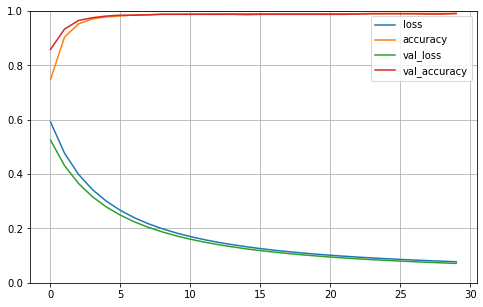

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Prediction with trained model 

In [38]:
# output
loss_tune, acc_tune = model.evaluate(X_tune, y_tune)

print("Tune set accuracy:", acc_tune)

31/31 [==============================] - 0s 918us/step - loss: 0.0714 - accuracy: 0.9908

Tune set accuracy: 0.9907692074775696


In [39]:
# predict
y_tune_prob = model.predict(X_tune)
y_tune_pred = (model.predict(X_tune) >= 0.5).astype("int32")

In [40]:
print(y_tune_prob[:10])
print(y_tune_pred[:10])

[[0.8408843 ]

 [0.12138605]

 [0.01820573]

 [0.01377887]

 [0.01198083]

 [0.5052698 ]

 [0.00240216]

 [0.00851282]

 [0.00373116]

 [0.9746169 ]]

[[1]

 [0]

 [0]

 [0]

 [0]

 [1]

 [0]

 [0]

 [0]

 [1]]


In [41]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

[[733   5]

 [  4 233]]


In [42]:
# calculate accuracy 
accuracy_score(y_true=y_tune, y_pred=y_tune_pred)

0.9907692307692307

And now I tuned the neural network with different learning rate and number of neurons in the hidden layer.

Try another model with different number of neurons

In [44]:
model_n2 = keras.Sequential([
    keras.layers.Dense(32, input_dim=X_train.shape[1], activation="relu"), # first hidden layer 
    keras.layers.Dense(1, activation="sigmoid") # output layer 
])

In [45]:
model_n2.summary()

Model: "sequential_1"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


dense_2 (Dense)              (None, 32)                416       

_________________________________________________________________

dense_3 (Dense)              (None, 1)                 33        


Total params: 449

Trainable params: 449

Non-trainable params: 0

_________________________________________________________________


Before I trained model, I had to compile it by defining the optimizer, loss function, and the metric used to monitor the training steps.

In [46]:
model_n2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.002, momentum=0.0), 
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Train model 2

After compiling the model, I trained the model the same way I would do in `sklearn`, I call `fit` and pass the training data as well as the labels. In `keras` I also need to specify the number of epochs I wish to train.

In [47]:
history = model_n2.fit(X_train, 
                    y_train, 
                    batch_size=16,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_tune, y_tune)
)

Epoch 1/30

285/285 [==============================] - 1s 2ms/step - loss: 0.8655 - accuracy: 0.5269 - val_loss: 0.6389 - val_accuracy: 0.7200

Epoch 2/30

285/285 [==============================] - 1s 2ms/step - loss: 0.5854 - accuracy: 0.7532 - val_loss: 0.4752 - val_accuracy: 0.8195

Epoch 3/30

285/285 [==============================] - 1s 2ms/step - loss: 0.4391 - accuracy: 0.8479 - val_loss: 0.3764 - val_accuracy: 0.8821

Epoch 4/30

285/285 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8951 - val_loss: 0.3095 - val_accuracy: 0.9169

Epoch 5/30

285/285 [==============================] - 1s 2ms/step - loss: 0.2954 - accuracy: 0.9301 - val_loss: 0.2611 - val_accuracy: 0.9477

Epoch 6/30

285/285 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.9557 - val_loss: 0.2247 - val_accuracy: 0.9672

Epoch 7/30

285/285 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9621 - val_loss: 0.1963 - val_accuracy: 

Keras uses the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have). 

In [48]:
# save model2
model_n2.save("wine_type_keras_model2.h5")

In [49]:
# save model1
model.save("wine_type_keras_model.h5")

### estimate performance of Model 2 in Tune set

In [50]:
# predict
y_tune_prob = model_n2.predict(X_tune)
y_tune_pred = (model_n2.predict(X_tune) >= 0.5).astype("int32")

In [51]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_tune, y_pred=y_tune_pred)
print(cm)

[[734   4]

 [  7 230]]


In [52]:
# calculate accuracy
print(accuracy_score(y_true=y_tune, y_pred=y_tune_pred))

0.9887179487179487


Model 1 result was better!

### Model performance in test set

**I used my saved keras model to make predictions on test set.**

In [53]:
# load saved model
model_saved = keras.models.load_model("wine_type_keras_model.h5")

In [54]:
# predict
y_test_prob = model_saved.predict(X_test)
y_test_pred = (model_saved.predict(X_test) >= 0.5).astype("int32")

In [55]:
# print out confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[710   4]

 [  5 256]]


In [56]:
# calculate accuracy
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

0.9907692307692307


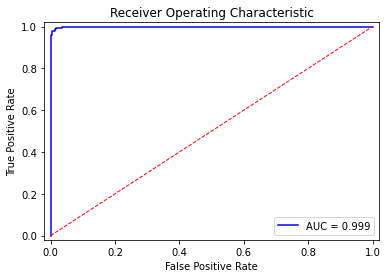

In [57]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_test_prob)
roc_auc = roc_auc_score(y_true=y_test, y_score=y_test_prob)

plt.plot(fpr, tpr, color="blue", label="AUC = %0.3f" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=1)
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.show()